#### Group by and Aggregate

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
FFBD_tot = pd.read_csv('/Users/alexanderlarson/Desktop/Python Projects/Fantasy Football Rankings/Fantasyfb_Data/FFBD_tot.csv')

#### Creating Subsets for player position

In [27]:
FFBD_tot = FFBD_tot.rename(columns={'Att (Rush)':'Att_Rush',
                          'Att (Pass)':'Att_Pass',
                          'Yds (Pass)':'Yds_Pass',
                          'Total Snaps': 'Total_Snaps',
                          'Yds (Rec)': 'Yds_Rec',
                          'PPR (Rec)': 'Tot_PPR_Rec',
                          'PPR (Rush)': 'PPR_Rush'})
dropcolumnsQBs = ['FantPos',
    'Tgt',
    'Rec',
    'Yds_Rec',
    'Y/R',
    'TD (Rec)',
    'PPR_Tgt',
    'Tot_PPR_Rec',
    'PPR_Rec']
dropcolumnsOther = ['FantPos',
    'Y/A (Pass)',
    'PPR (Pass)',
    'Cmp',
    'Att_Pass',
    'Yds_Pass',
    'TD (Pass)',
    'Int']
QBs = FFBD_tot[FFBD_tot['FantPos'] == 'QB'].drop(columns=dropcolumnsQBs)
RBs = FFBD_tot[FFBD_tot['FantPos'] == 'RB'].drop(columns=dropcolumnsOther)
WRs = FFBD_tot[FFBD_tot['FantPos'] == 'WR'].drop(columns=dropcolumnsOther)
TEs = FFBD_tot[FFBD_tot['FantPos'] == 'TE'].drop(columns=dropcolumnsOther)

#### Distribution of Player Age by Position

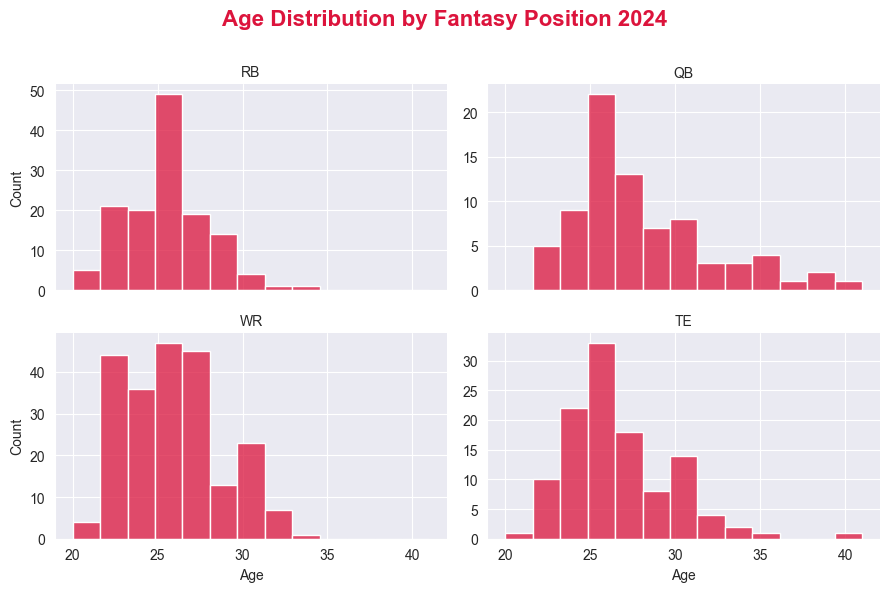

In [28]:
FFBD_2024 = FFBD_tot[FFBD_tot['Year'] == 2024]
sns.set_style('darkgrid')
g = sns.displot(
    data=FFBD_2024,
    x="Age",
    col="FantPos",
    col_wrap=2,
    bins=13,
    color="crimson",
    facet_kws={"sharex": True, "sharey": False},
    height=3,
    aspect=1.5
)

g.set_axis_labels("Age", "Count")
g.set_titles("{col_name}")
g.figure.suptitle("Age Distribution by Fantasy Position 2024", fontsize=16, fontweight='bold', color='crimson')
g.figure.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#### Average PPR Scored per Snap by Position

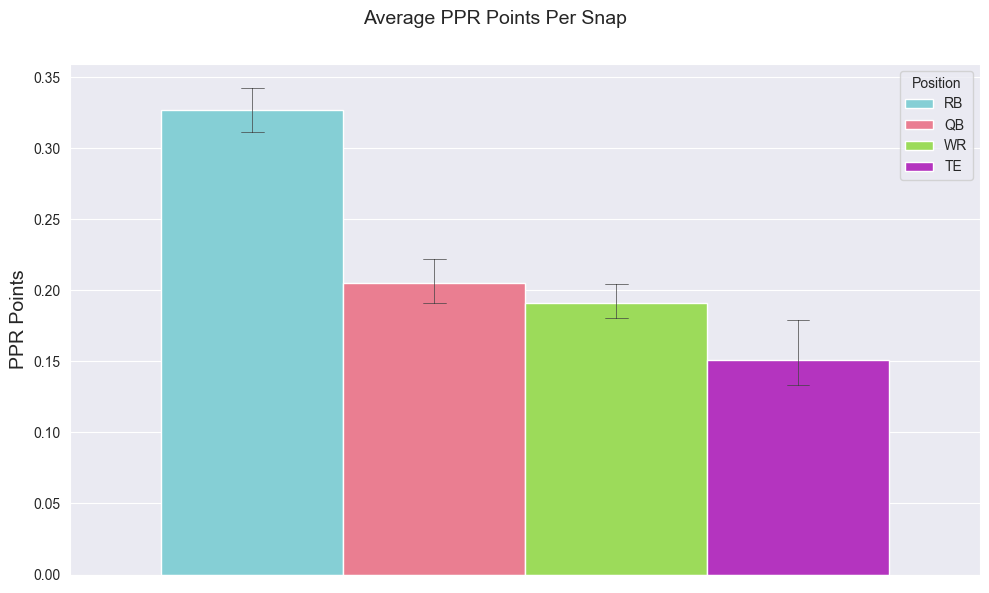

In [29]:
palette = ['#78DBE2', '#FC6C85', "#9DF045", "#C71DD6"]
plt.figure(figsize=(10,6))
b = sns.barplot(
    data=FFBD_tot,
    y='PPR_Snap',
    hue='FantPos',
    palette=palette,
    estimator='mean',
    legend='brief',
    capsize=0.1,
    err_kws={'linewidth':0.5}
)

# plt.title('Average Points Per Snap PPR', fontweight = 'bold', fontsize = 16, color = "#F08B1F")
b.set_ylabel('PPR Points', fontsize = 14)
b.figure.suptitle('Average PPR Points Per Snap', fontsize = 14)
b.legend(title='Position')
plt.tight_layout(rect =[0,0,1,0.97])
plt.show()

#### Running Quarterback are Good for Fantasy. The following ols model shows that when controlling for relevant fantasy scoring statistics, every quarterback rush attempt is associated with a 0.77 PPR fantasy point increase.

In [30]:
import statsmodels.formula.api as smf

In [31]:
QB_reg = smf.ols('PPR ~ Att_Rush + Att_Pass + Yds_Pass + TD + Total_Snaps', data=QBs).fit()
print(QB_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPR   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     6413.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:34:36   Log-Likelihood:                -2579.5
No. Observations:                 614   AIC:                             5171.
Df Residuals:                     608   BIC:                             5198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.4220      0.999     -4.429      

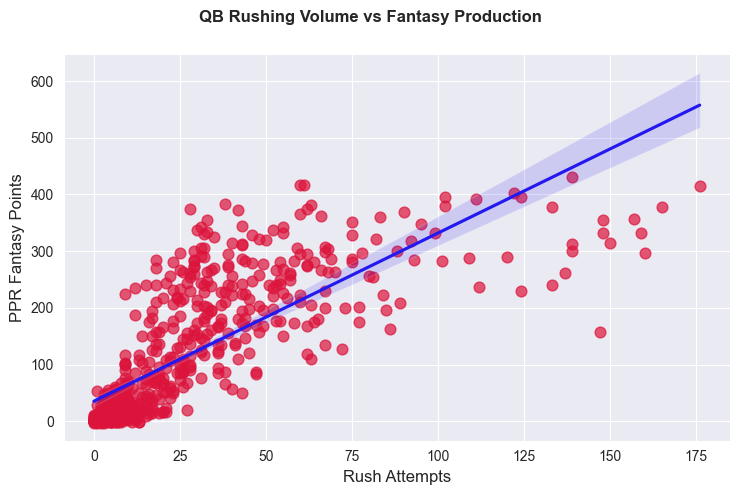

In [32]:
regplot = sns.lmplot(data=QBs,
                     x='Att_Rush',
                     y='PPR',
                     fit_reg=True,
                     aspect=1.5,
                     height=5,
                     scatter_kws={'s': 60,
                                  'color':'crimson',
                                  'alpha': 0.7,
                                  'marker': 'o'
                                 },
                     line_kws={'color':"#2318F0"})
regplot.set_axis_labels('Rush Attempts', 'PPR Fantasy Points', fontsize=12)
regplot.figure.suptitle('QB Rushing Volume vs Fantasy Production', fontweight='bold')
regplot.figure.tight_layout(rect=[0,0,1,0.98])
plt.show()

#### QB PPR Points Per Pass Attempt + Rush Attempt

In [33]:
mask = pd.notna(QBs['TD']) & (QBs['TD'] !=0) & pd.notna(QBs['Total_Snaps']) & (QBs['Total_Snaps'] !=0)
QBs.loc[mask, 'TD_Pct'] = (QBs.loc[mask, 'TD'] / QBs.loc[mask, 'Total_Snaps']) * 100

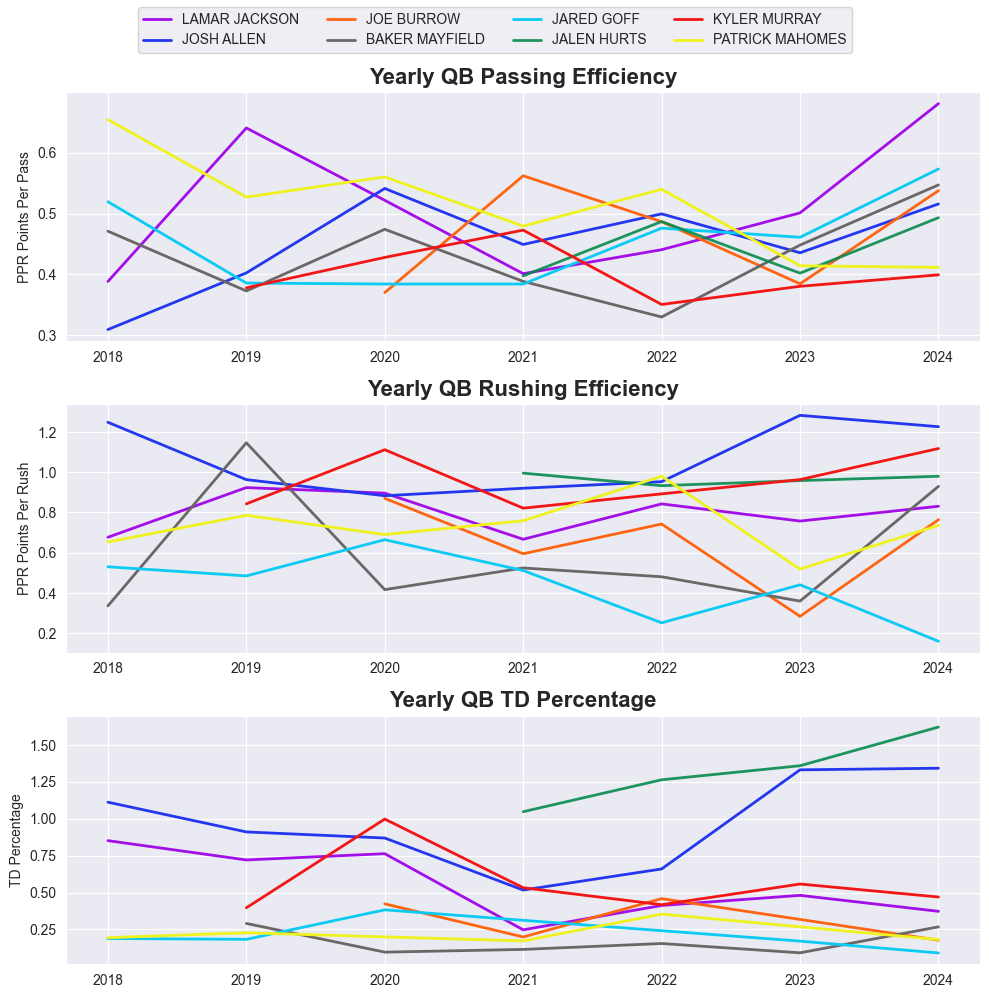

In [34]:
QBs_2024 = QBs[QBs['Year'] == 2024]
QB_Efficiency = QBs_2024.nlargest(10, 'PPR')
Relevant_QBs_2025 = ['LAMAR JACKSON',
                        'JOSH ALLEN',
                        'JOE BURROW',
                        'BAKER MAYFIELD',
                        'JARED GOFF',
                        'JALEN HURTS',
                        'PATRICK MAHOMES',
                        'KYLER MURRAY']
QBs_to_plot = QBs.loc[QBs['Player'].isin(Relevant_QBs_2025)]
QBs_to_plot = QBs_to_plot[QBs_to_plot['Year'] != 2017]
QBs_to_plot = QBs_to_plot[QBs_to_plot['Total_Snaps'] > 27]
custom_palette = ["#A30FE8",
                  "#2338EE",
                  "#FD6513",
                  "#6B6767",
                  "#0BCAF4",
                  "#02894CE1",
                  "#F31616",
                  "#EFF31D",
                  ]
custom_hue = ["#F0C919",
              "#020B89"]
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='PPR_PassAtt',
                 hue='Player',
                 palette=custom_palette,
                 linewidth=2,
                 ax=ax[0])
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
ax[0].set_title('Yearly QB Passing Efficiency', fontweight='bold', fontsize=16)
ax[0].set_ylabel('PPR Points Per Pass')
ax[0].set_xlabel('')

sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='PPR_RushAtt',
                 hue='Player',
                 palette=custom_palette,
                 linewidth=2,
                 ax=ax[1],
                 legend=False)
# ax[1].legend(title='',
#          title_fontsize=12,
#          loc = 'lower left',
#         #  bbox_to_anchor = (0.3,0.05)
#          )
ax[1].set_title('Yearly QB Rushing Efficiency', fontweight='bold', fontsize=16)
ax[1].set_ylabel('PPR Points Per Rush')
ax[1].set_xlabel('')

sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='TD_Pct',
                 hue='Player',
                 palette=custom_palette,
                 linewidth=2,
                 ax=ax[2],
                 legend=False)
ax[2].set_title('Yearly QB TD Percentage', fontweight='bold', fontsize=16)
ax[2].set_ylabel('TD Percentage')
ax[2].set_xlabel('')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4,fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### How Important is Receiving for Running Backs?

In [35]:
RBs['Tgt_Binned'] = pd.cut(RBs['Tgt'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
RBs['Att_Rush_Binned'] = pd.cut(RBs['Att_Rush'], bins=[0,26,52,78,104,130,156,182,208,234,260,286,312,338,364,390])

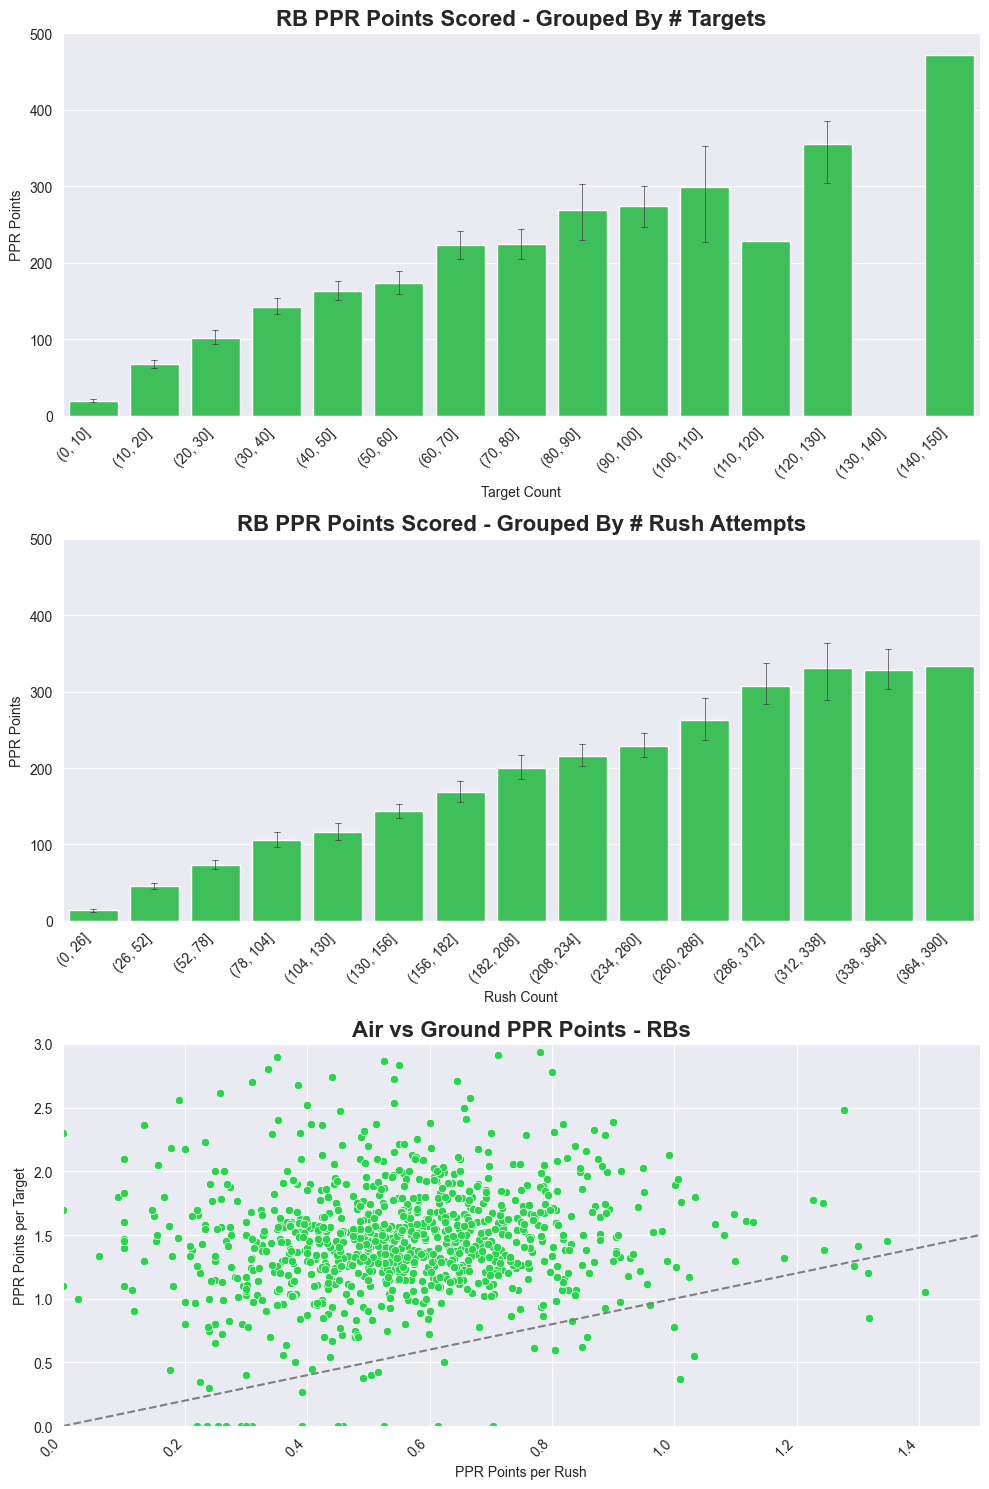

In [36]:
fig, ax = plt.subplots(3,1,figsize=(10,15))
sns.barplot(RBs,
            x='Tgt_Binned',
            y='PPR',
            estimator='mean',
            capsize=0.1,
            err_kws={'linewidth':0.5},
            color="#2AD44C",
            ax=ax[0]
            )
ax[0].set_title('RB PPR Points Scored - Grouped By # Targets', fontweight='bold', fontsize=16)
ax[0].set_xlabel('Target Count')
ax[0].set_ylabel('PPR Points')
ax[0].set_ybound(0,500)
sns.barplot(RBs,
            x='Att_Rush_Binned',
            y='PPR',
            estimator='mean',
            capsize=0.1,
            err_kws={'linewidth':0.5},
            color="#2AD44C",
            ax=ax[1]
            )
ax[1].set_title('RB PPR Points Scored - Grouped By # Rush Attempts', fontweight='bold', fontsize=16)
ax[1].set_xlabel('Rush Count')
ax[1].set_ylabel('PPR Points')
ax[1].set_ybound(0,500)
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

sns.scatterplot(
    data=RBs,
    x='PPR_RushAtt',
    y='PPR_Tgt',
    color = "#2AD44C",
    ax=ax[2]
)
ax[2].set_title('Air vs Ground PPR Points - RBs', fontsize=16,fontweight='bold')
ax[2].set_xlabel('PPR Points per Rush')
ax[2].set_ylabel('PPR Points per Target')
ax[2].axline((0,0), slope=1, color='gray', ls='--')
ax[2].set_ylim(0,3)
ax[2].set_xlim(0,1.5)
plt.tight_layout()
plt.show()

#### Rushing vs Receiving Leaders for Running Backs

In [37]:
RBs_2024 = RBs[RBs['Year'] == 2024]
Top_RBs_Ground_2024 = RBs_2024.sort_values('PPR_Rush', ascending=False).head(10)
Top_RBs_Air_2024 = RBs_2024.sort_values('Tot_PPR_Rec', ascending=False).head(10)

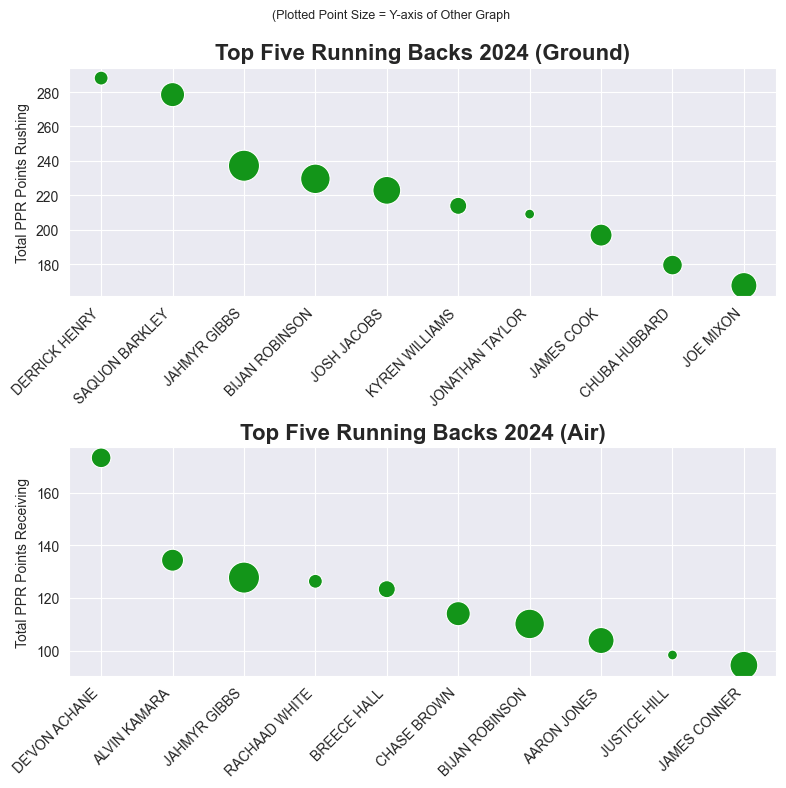

In [38]:
scatter_palette = ["#042206",
                   "#062E08",
                   "#0A4C0D",
                   "#0C5B10",
                   "#108716",
                   "#139519",
                   "#17BD1F",
                   "#18C421",
                   "#1AE524",
                   "#1EFE29"]
sizes = [50,100,150,200,250,300,350,400,450,500]
fig, ax = plt.subplots(2,1, figsize=(8,8))
sns.scatterplot(
    Top_RBs_Ground_2024,
    x='Player',
    y='PPR_Rush',
    size='Tot_PPR_Rec',
    sizes=sizes,
    color="#139519",
    s=150,
    legend=False,
    ax=ax[0]
)

ax[0].set_title('Top Five Running Backs 2024 (Ground)', fontsize=16, fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('Total PPR Points Rushing')


sns.scatterplot(
    Top_RBs_Air_2024,
    x='Player',
    y='Tot_PPR_Rec',
    size='PPR_Rush',
    sizes=sizes,
    color='#139519',
    legend=False,
    ax=ax[1]
)

ax[1].set_title('Top Five Running Backs 2024 (Air)', fontsize=16, fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('Total PPR Points Receiving')
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
plt.suptitle('(Plotted Point Size = Y-axis of Other Graph', fontsize=9)
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

#### Wide Receivers' Receptions Matter More in PPR

In [45]:
WRs['PPR_Yards_Only'] = WRs['Yds_Rec'] * 0.1

In [51]:
sizes=[(WRs['Rec'].sum()),(WRs['PPR_Yards_Only'].sum())]

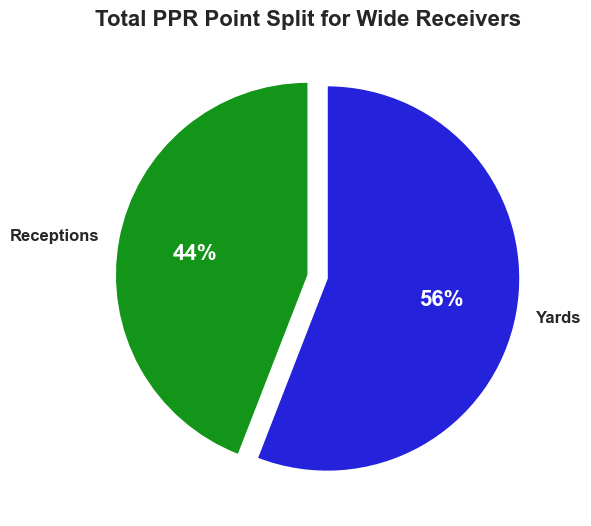

In [59]:
pie_colors=['#139519',"#2522DC"]
fig, ax = plt.subplots(figsize=(6,6))
wedges, text, autotexts = ax.pie(
    sizes,
    labels=['Receptions', 'Yards'],
    colors=pie_colors,
    explode=[0,0.1],
    startangle=90,
    autopct = ('%1.0f%%')
)
for t in text:
    t.set_fontsize(12),
    t.set_fontweight('bold')

for t in autotexts:
    t.set_fontsize(16)
    t.set_fontweight('bold')
    t.set_color('white')
ax.set_title("Total PPR Point Split for Wide Receivers", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()